In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import pmdarima as pm
import warnings 

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima



warnings.filterwarnings("ignore") 

%matplotlib inline

In [2]:
sns.set()

df_train = pd.read_csv("../../data/datasets_modal_spx_train.csv")
df_test = pd.read_csv("../../data/datasets_modal_spx_test.csv")

In [3]:
df_train["date"] = pd.to_datetime(df_train["date"])
df_train = df_train.groupby([pd.Grouper(key='date', freq='W-SUN')])['close'].mean().reset_index()

df_test["date"] = pd.to_datetime(df_test["date"])
df_test = df_test.groupby([pd.Grouper(key='date', freq='W-SUN')])['close'].mean().reset_index()


#boxcox
df_train_boxcox = df_train.copy()
df_train_boxcox.columns = ['date','close']
df_train_boxcox['close'], lam = boxcox(df_train_boxcox['close'])

df_test_boxcox = df_test.copy()
df_test_boxcox.columns = ['date','close']
df_test_boxcox['close'], lam = boxcox(df_test_boxcox['close'])

# Naive

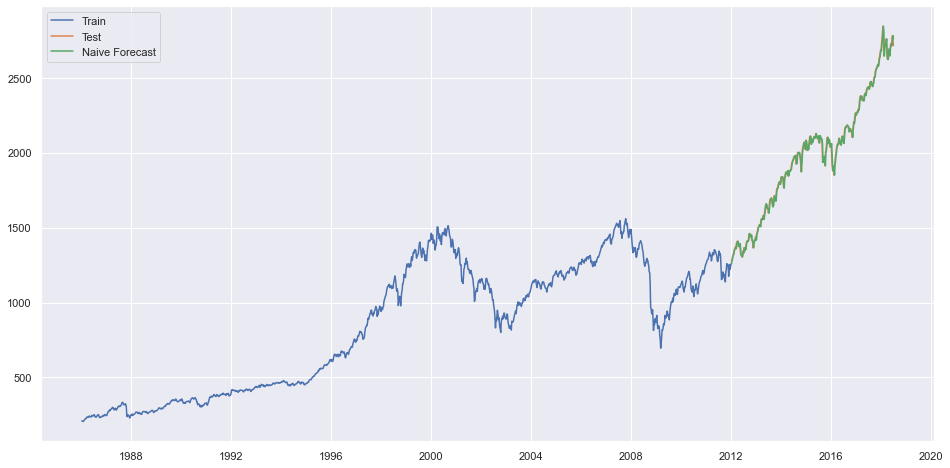

In [4]:
actual_values = df_test.close
df_train_history = [x for x in df_train.close]
predictions = list()
for i in range(len(actual_values)):
    predictions.append(df_train_history[-1])
    df_train_history.append(actual_values[i])
df_predict = df_test.copy()
df_predict['close'] = predictions
plt.figure(figsize=(16,8))
plt.plot(df_train.date, df_train.close, label='Train')
plt.plot(df_test.date,df_test.close, label='Test')
plt.plot(df_predict.date,df_predict.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

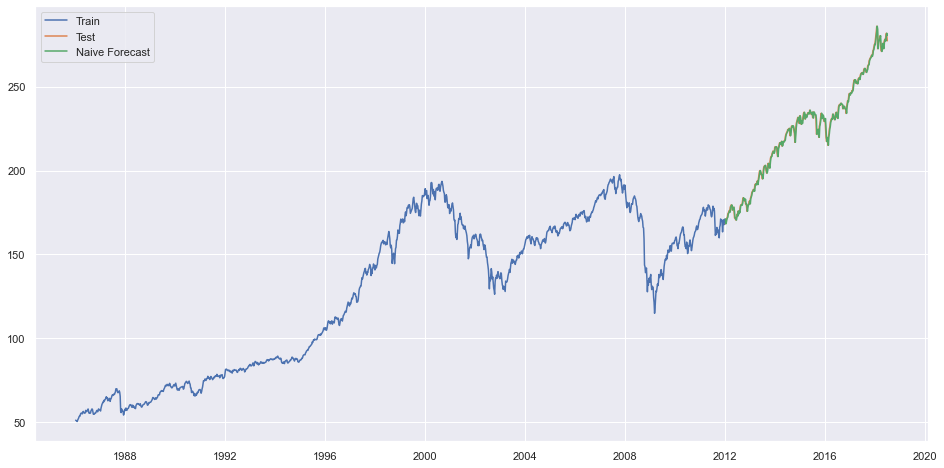

In [5]:
actual_values_boxcox = df_test_boxcox.close
df_train_history_boxcox = [x for x in df_train_boxcox.close]
predictions_boxcox = list()
for i in range(len(actual_values_boxcox)):
    predictions_boxcox.append(df_train_history_boxcox[-1])
    df_train_history_boxcox.append(actual_values_boxcox[i])
df_predict_boxcox = df_test_boxcox.copy()
df_predict_boxcox['close'] = predictions_boxcox
plt.figure(figsize=(16,8))
plt.plot(df_train_boxcox.date, df_train_boxcox.close, label='Train')
plt.plot(df_test_boxcox.date,df_test_boxcox.close, label='Test')
plt.plot(df_predict_boxcox.date,df_predict_boxcox.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

# Moving average

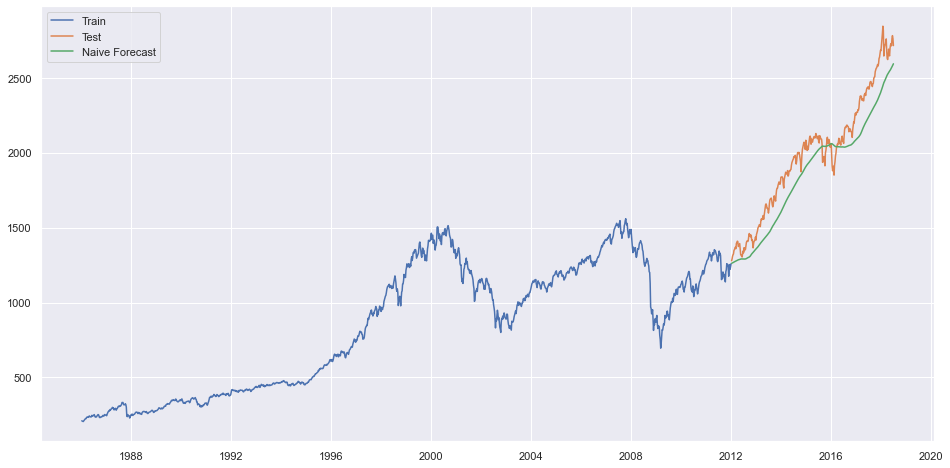

In [6]:
actual_values = df_test.close
df_train_history = [x for x in df_train.close]
predictions = list()
for i in range(len(actual_values)):
    predictions.append((round(sum(df_train_history[-60:]),2) /60))
    df_train_history.append(actual_values[i])
df_predict = df_test.copy()
df_predict['close'] = predictions
plt.figure(figsize=(16,8))
plt.plot(df_train.date, df_train.close, label='Train')
plt.plot(df_test.date,df_test.close, label='Test')
plt.plot(df_predict.date,df_predict.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()


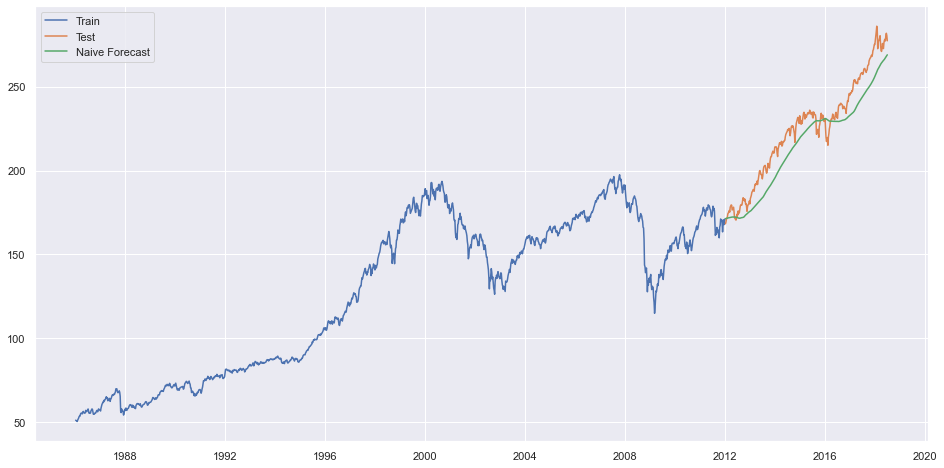

In [7]:
actual_values_boxcox = df_test_boxcox.close
df_train_history_boxcox = [x for x in df_train_boxcox.close]
predictions_boxcox = list()
for i in range(len(actual_values_boxcox)):
    predictions_boxcox.append((round(sum(df_train_history_boxcox[-60:]),2) /60))
    df_train_history_boxcox.append(actual_values_boxcox[i])
df_predict_boxcox = df_test_boxcox.copy()
df_predict_boxcox['close'] = predictions_boxcox
plt.figure(figsize=(16,8))
plt.plot(df_train_boxcox.date, df_train_boxcox.close, label='Train')
plt.plot(df_test_boxcox.date,df_test_boxcox.close, label='Test')
plt.plot(df_predict_boxcox.date,df_predict_boxcox.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

# Exponential smoothing

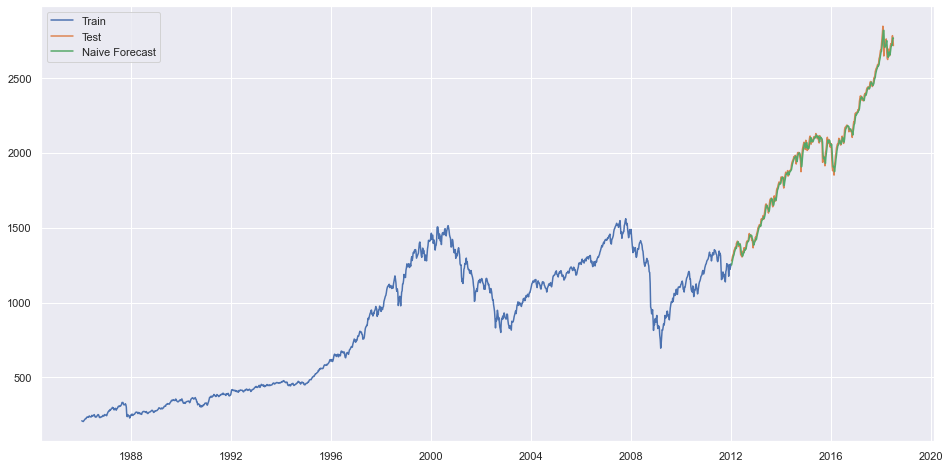

In [8]:
actual_values = df_test.close
df_train_history = [x for x in df_train.close]
predictions = list()
alpha = 1
for i in range(len(actual_values)):
    model_fit = SimpleExpSmoothing(df_train_history).fit(smoothing_level=0.6,optimized=False)
    predictions.append(model_fit.predict(len(df_train_history),len(df_train_history)))
    df_train_history.append(actual_values[i])
df_predict = df_test.copy()
df_predict['close'] = predictions
plt.figure(figsize=(16,8))
plt.plot(df_train.date, df_train.close, label='Train')
plt.plot(df_test.date,df_test.close, label='Test')
plt.plot(df_predict.date,df_predict.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

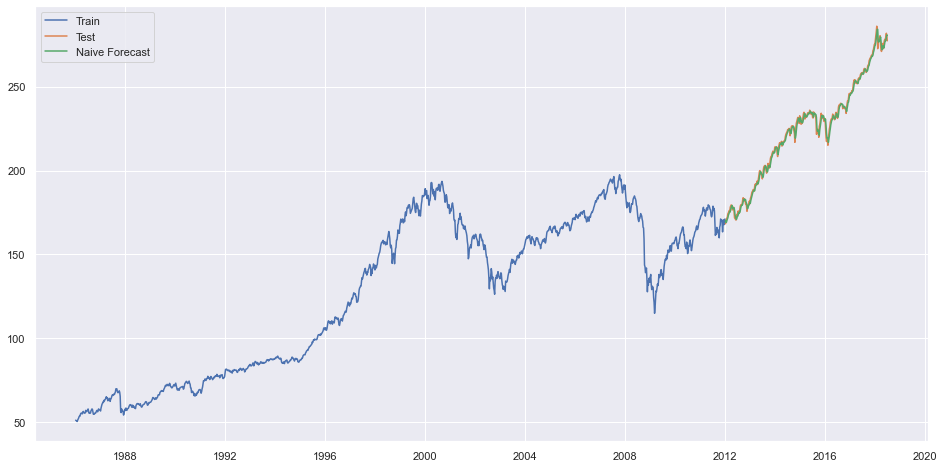

In [9]:
actual_values_boxcox = df_test_boxcox.close
df_train_history_boxcox = [x for x in df_train_boxcox.close]
predictions_boxcox = list()
for i in range(len(actual_values_boxcox)):
    model_fit_boxcox = SimpleExpSmoothing(df_train_history_boxcox).fit(smoothing_level=0.6,optimized=False)
    predictions_boxcox.append(model_fit_boxcox.predict(len(df_train_history_boxcox), len(df_train_history_boxcox)))
    df_train_history_boxcox.append(actual_values_boxcox[i])
df_predict_boxcox = df_test_boxcox.copy()
df_predict_boxcox['close'] = predictions_boxcox
plt.figure(figsize=(16,8))
plt.plot(df_train_boxcox.date, df_train_boxcox.close, label='Train')
plt.plot(df_test_boxcox.date,df_test_boxcox.close, label='Test')
plt.plot(df_predict_boxcox.date,df_predict_boxcox.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

# Holt-Winter

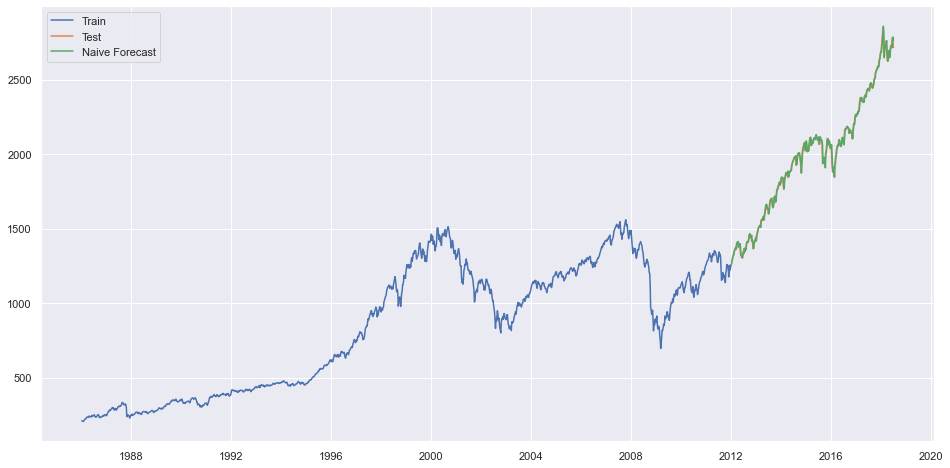

In [10]:
actual_values = df_test.close
df_train_history = [x for x in df_train.close]
predictions = list()
for i in range(len(actual_values)):
    model_fit = ExponentialSmoothing(df_train_history, trend='add', seasonal='add', seasonal_periods=6).fit()
    predictions.append(model_fit.predict(len(df_train_history),len(df_train_history)))
    df_train_history.append(actual_values[i])
df_predict = df_test.copy()
df_predict['close'] = predictions
plt.figure(figsize=(16,8))
plt.plot(df_train.date, df_train.close, label='Train')
plt.plot(df_test.date,df_test.close, label='Test')
plt.plot(df_predict.date,df_predict.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

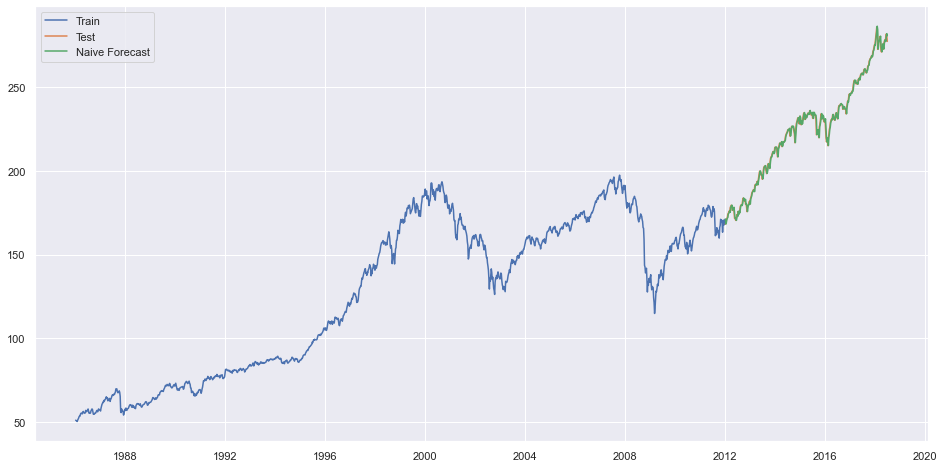

In [11]:
actual_values_boxcox = df_test_boxcox.close
df_train_history_boxcox = [x for x in df_train_boxcox.close]
predictions_boxcox = list()
for i in range(len(actual_values_boxcox)):
    model_fit_boxcox = ExponentialSmoothing(df_train_history_boxcox , trend='add', seasonal='add', seasonal_periods=6).fit()
    predictions_boxcox.append(model_fit_boxcox.predict(len(df_train_history_boxcox),len(df_train_history_boxcox)))
    df_train_history_boxcox.append(actual_values_boxcox[i])
df_predict_boxcox = df_test_boxcox.copy()
df_predict_boxcox['close'] = predictions_boxcox
plt.figure(figsize=(16,8))
plt.plot(df_train_boxcox.date, df_train_boxcox.close, label='Train')
plt.plot(df_test_boxcox.date,df_test_boxcox.close, label='Test')
plt.plot(df_predict_boxcox.date,df_predict_boxcox.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

# Arima - Cálculos

In [12]:
df_arima = df_train.copy()
result = adfuller(df_arima.close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.256255
p-value: 0.648941


<Figure size 1152x576 with 0 Axes>

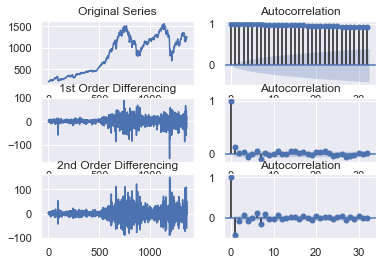

In [20]:
# Original Series
plt.figure(figsize=(16,8))
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_train.close); axes[0, 0].set_title('Original Series')
plot_acf(df_train.close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_train.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_train.close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_train.close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_train.close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [14]:
df_diff = df_arima.copy()
result = adfuller(df_diff.close.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.810978
p-value: 0.000000


In [15]:
stepwise_fit = auto_arima(df_train["close"], start_p = 1, start_q = 1, 

                          max_p = 3, max_q = 3, seasonal = False, 

                          d = 1, trace = True, 

                          error_action ='ignore',   # we don't want to know if an order does not work 

                          suppress_warnings = True)           # set to stepwise 

  
# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11740.716, Time=9.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11759.142, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11738.726, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11738.900, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11759.520, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11740.721, Time=1.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11742.726, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11738.569, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11740.556, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11740.537, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11738.804, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11742.570, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 11.992 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1357
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -5867.285
Date:                Mon, 26 Oct 2020   AIC                          11738.569
Time:                        10:39:22   BIC                          11748.994
Sample:                             0   HQIC                         11742.473
                               - 1357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1295      0.017      7.831      0.000       0.097       0.162
sigma2       335.8458      6.743     49.807      0.000     322.630     349.062
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2385.33
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              14.24   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model_arima = ARIMA(df_train.close, order=(1,1,0))
model_fit_arima = model_arima.fit()
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1357
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5867.285
Date:                Mon, 26 Oct 2020   AIC                          11738.569
Time:                        10:39:23   BIC                          11748.994
Sample:                             0   HQIC                         11742.473
                               - 1357                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1295      0.017      7.831      0.000       0.097       0.162
sigma2       335.8458      6.743     49.807      0.000     322.630     349.062
Ljung-Box (L1) (Q):                   0.00   Jarque-

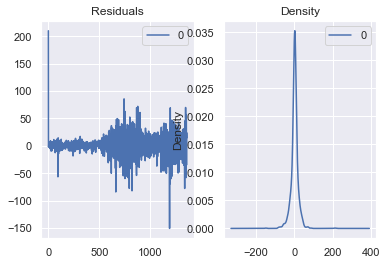

In [17]:
residuals = pd.DataFrame(model_fit_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Arima - Gráficos

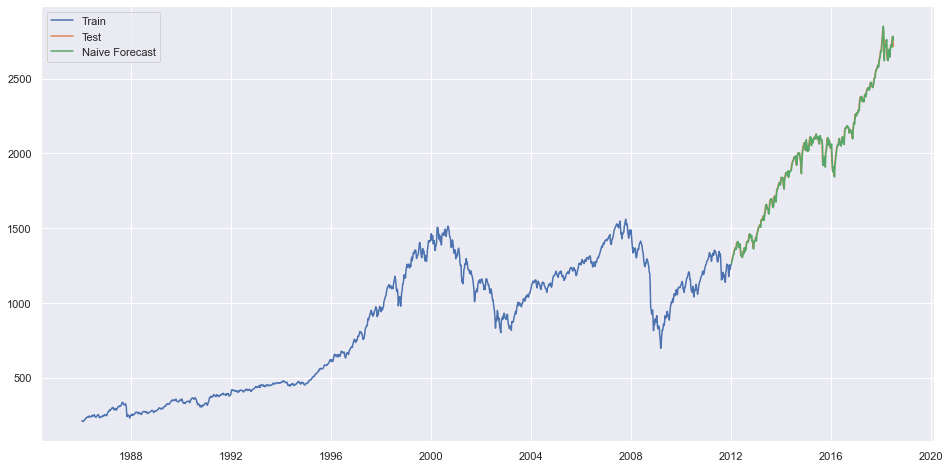

In [18]:
actual_values = df_test.close
df_train_history = [x for x in df_train.close]
predictions = list()
for i in range(len(actual_values)):
    model_fit = ARIMA(df_train_history,order=(1,1,0)).fit()
    predictions.append(model_fit.predict(len(df_train_history),len(df_train_history)))
    df_train_history.append(actual_values[i])
df_predict = df_test.copy()
df_predict['close'] = predictions
plt.figure(figsize=(16,8))
plt.plot(df_train.date, df_train.close, label='Train')
plt.plot(df_test.date,df_test.close, label='Test')
plt.plot(df_predict.date,df_predict.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()

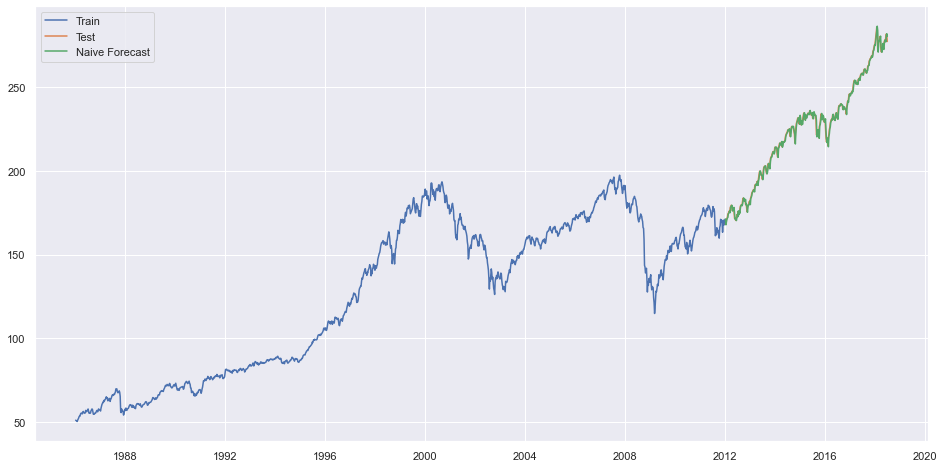

In [19]:
actual_values_boxcox = df_test_boxcox.close
df_train_history_boxcox = [x for x in df_train_boxcox.close]
predictions_boxcox = list()
for i in range(len(actual_values_boxcox)):
    model_fit_boxcox = ARIMA(df_train_history_boxcox, order=(1,1,0)).fit()
    predictions_boxcox.append(model_fit_boxcox.predict(len(df_train_history_boxcox),len(df_train_history_boxcox)))
    df_train_history_boxcox.append(actual_values_boxcox[i])
df_predict_boxcox = df_test_boxcox.copy()
df_predict_boxcox['close'] = predictions_boxcox
plt.figure(figsize=(16,8))
plt.plot(df_train_boxcox.date, df_train_boxcox.close, label='Train')
plt.plot(df_test_boxcox.date,df_test_boxcox.close, label='Test')
plt.plot(df_predict_boxcox.date,df_predict_boxcox.close, label='Naive Forecast')
plt.legend(loc='best')
plt.show()